In [6]:
import numpy as np
import pandas as pd
import stockstats as st
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

In [7]:
data = st.StockDataFrame.retype(pd.read_csv('/home/anupam/stockPrediction/data/^NSEI.csv'))

In [8]:
data.head()

,open,high,low,close,adj close,volume
date,,,,,,
2008-07-01,4039.750000,4075.399902,3878.199951,3896.750000,3896.750000,0.0
2008-07-02,3895.300049,4107.149902,3848.250000,4093.350098,4093.350098,0.0
2008-07-03,4094.600098,4097.350098,3874.850098,3925.750000,3925.750000,0.0
2008-07-04,3926.649902,4033.500000,3896.399902,4016.000000,4016.000000,0.0
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0.0


In [9]:
data.index = pd.to_datetime(data.index)

In [10]:
data.head()

,open,high,low,close,adj close,volume
date,,,,,,
2008-07-01,4039.750000,4075.399902,3878.199951,3896.750000,3896.750000,0.0
2008-07-02,3895.300049,4107.149902,3848.250000,4093.350098,4093.350098,0.0
2008-07-03,4094.600098,4097.350098,3874.850098,3925.750000,3925.750000,0.0
2008-07-04,3926.649902,4033.500000,3896.399902,4016.000000,4016.000000,0.0
2008-07-07,4002.000000,4114.500000,4002.000000,4030.000000,4030.000000,0.0


In [44]:
SMA5 = data['adj close'].rolling(window=5).mean()
SMA10 = data['adj close'].rolling(window=10).mean()
SMA20 = data['adj close'].rolling(window=20).mean()
data = pd.concat([data,SMA5,SMA10,SMA20],axis=1,sort=False)
data.columns.values[6] = 'sma5'
data.columns.values[7] = 'sma10'
data.columns.values[8] = 'sma15'

In [45]:
prev = 0
i = 1
def calc(diff,volume):
    "part of on balance volume"
    global i
    global prev
    if i == 1:
        i = 0
        prev = volume
        return volume
    elif diff > 0:
        value = prev = prev + volume
        return value
    elif diff < 0:
        value = prev = prev - volume
        return value
    elif diff == 0:
        value = prev
        return value

def OBV(data):
    "function to calculate on balance volume"
    data['prior close'] = data['adj close'].shift(1)
    data['diff'] = data['adj close'] - data['prior close']
    temp = [calc(x,y) for x,y in zip(data['diff'].values[1:],data['volume'].values[1:])]
    temp = temp + [0]
    temp = np.array(temp)
    data['obv'] = temp
    data['obv'] = data['obv'].shift(1)
    data.drop(['prior close','diff'],axis=1,inplace=True)
    return data

data = OBV(data)

In [46]:
data['macd']  #to calculate moving avrage convergence divergence
data['rsi_10']#to calculate relative strength index for 10 dsys
data['rsi_20']#to calculate relative strength index for 20 days
data['cci_20']#to calculate commodity channel index for 20 days
data['atr']   #to calculate average true range for 14 days
data['wr_14'] #to calculate williams%R for 14 days
data['kdjk']  #a stochastic oscillator
data['kdjd']  #a stochastic oscillator(here a is used so that cell doesn't display the series)
a = data['trix'] # to calculate triple exponentially smoothed moving average

/home/anupam/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/anupam/anaconda3/lib/python3.6/site-packages/stockstats.py:387: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  lambda x: np.fabs(x - x.mean()).mean())


In [47]:
featureList = ['open', 'high', 'low', 'adj close','volume','sma5','sma10','sma15','macd','rsi_10', 'rsi_20','cci_20','atr','wr_14','kdjk','kdjd','obv','trix']
data1 = data[featureList]

In [48]:
data1.dropna(inplace=True)

In [49]:
data1.tail(15)

,open,high,low,adj close,volume,sma5,sma10,sma15,macd,rsi_10,rsi_20,cci_20,atr,wr_14,kdjk,kdjd,obv,trix
date,,,,,,,,,,,,,,,,,,
2018-06-11,10781.849609,10850.549805,10777.049805,10786.950195,211400.0,10720.150195,10690.925098,10651.135059,38.265230,61.541269,57.754716,120.130802,101.382179,14.696617,74.869279,69.412109,1.40882e+07,0.026008
2018-06-12,10816.150391,10856.549805,10789.400391,10842.849609,198300.0,10770.090039,10711.880078,10653.185059,47.236229,65.495496,59.903869,141.125649,99.111899,3.136851,81.752078,73.525432,1.42865e+07,0.036241
2018-06-13,10887.500000,10893.250000,10842.650391,10856.700195,213400.0,10804.500000,10736.115137,10658.965088,54.831358,66.445309,60.428923,153.226963,95.646598,9.898390,84.275998,77.108954,1.44999e+07,0.047458
2018-06-14,10832.900391,10833.700195,10773.549805,10808.049805,184300.0,10812.440039,10743.305078,10665.232568,56.276201,59.999389,57.638261,99.218059,94.753979,24.886897,81.221699,78.479869,1.43156e+07,0.056711
2018-06-15,10808.650391,10834.000000,10755.400391,10817.700195,305400.0,10822.450000,10755.455078,10676.297559,57.536698,60.836755,58.042840,87.048168,93.600056,22.068027,80.125124,79.028287,1.4621e+07,0.064300
2018-06-18,10830.200195,10830.200195,10787.349609,10799.849609,196600.0,10825.029883,10772.590039,10690.455029,56.444614,58.327265,56.983195,80.750733,89.974978,27.282167,76.567429,78.208001,1.44244e+07,0.069548
2018-06-19,10789.450195,10789.450195,10701.200195,10710.450195,224500.0,10798.550000,10784.320019,10699.142529,47.814241,47.438269,51.980430,25.550534,90.594599,53.395652,52.650439,69.688814,1.41999e+07,0.069736
2018-06-20,10734.650391,10781.799805,10724.049805,10772.049805,193500.0,10781.619922,10793.059961,10716.227539,45.421546,54.011333,54.855123,38.267857,89.219919,35.402463,47.397382,62.258337,1.43934e+07,0.068698
2018-06-21,10808.450195,10809.599609,10725.900391,10741.099609,223600.0,10768.229883,10790.334961,10727.590039,40.560361,50.486668,53.171616,30.467931,88.825573,44.442987,38.523440,54.346704,1.41698e+07,0.065679


In [50]:
data1.shape

(1992, 18)

In [51]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
data1Scaled = pd.DataFrame(scaler.fit_transform(data1),columns=featureList)

In [52]:
data1Scaled.head()

,open,high,low,adj close,volume,sma5,sma10,sma15,macd,rsi_10,rsi_20,cci_20,atr,wr_14,kdjk,kdjd,obv,trix
0,-1.219755,-1.206598,-1.195259,-1.193958,-1.033059,-1.182240,-1.277566,-1.307898,0.564323,0.635386,0.877955,0.890345,2.236783,-0.461605,0.779862,0.786848,-0.740577,1.034894
1,-1.195297,-1.216631,-1.255492,-1.263663,-1.033059,-1.187176,-1.261379,-1.300655,0.464890,-0.060234,0.194973,0.385657,2.324342,0.136742,0.449249,0.691535,-0.740577,1.119661
2,-1.264339,-1.219183,-1.239810,-1.203048,-1.033059,-1.203212,-1.236914,-1.295214,0.485241,0.380119,0.602504,0.530369,2.270096,-0.383577,0.387654,0.604525,-0.740577,1.182973
3,-1.204037,-1.211823,-1.193644,-1.193541,-1.033059,-1.213093,-1.217919,-1.285153,0.509256,0.445041,0.662708,0.626342,1.930353,-0.465181,0.248302,0.493423,-0.740577,1.231289
4,-1.195591,-1.172106,-1.218036,-1.154046,-1.033059,-1.203104,-1.202098,-1.275330,0.589686,0.709943,0.906202,0.685936,2.090205,-0.804207,0.326502,0.449150,-0.740577,1.292791


In [53]:
data1Scaled['Label'] = np.array(data1['adj close'].shift(-30).values)

In [54]:
data1Scaled.tail(20)

,open,high,low,adj close,volume,sma5,sma10,sma15,macd,rsi_10,rsi_20,cci_20,atr,wr_14,kdjk,kdjd,obv,trix,Label
1972,1.955062,1.942138,1.905003,1.891408,0.995922,1.913266,1.894090,1.933492,0.004669,-0.286323,-0.191553,-0.103778,0.382140,0.035861,0.416011,0.132546,2.452501,-0.140621,NaN
1973,1.888835,1.874848,1.872000,1.874086,0.636520,1.909322,1.896870,1.930412,-0.063210,-0.490710,-0.351391,-0.643414,0.318685,0.280359,0.183643,0.154133,2.413819,-0.145635,NaN
1974,1.875492,1.906837,1.889908,1.918923,0.857537,1.916228,1.909391,1.929002,-0.025392,0.054413,0.039510,-0.143204,0.342794,-0.568022,0.238037,0.189250,2.457621,-0.142800,NaN
1975,1.933835,1.965542,1.956013,1.959937,1.166165,1.919391,1.921923,1.930282,0.086879,0.465721,0.362130,0.688324,0.430501,-0.942786,0.489158,0.308343,2.508575,-0.123746,NaN
1976,1.940593,1.946628,1.949383,1.959594,1.051674,1.926409,1.929925,1.929322,0.170444,0.460704,0.358630,0.579894,0.329191,-0.937280,0.653097,0.450202,2.460274,-0.096353,NaN
1977,1.962847,1.981512,1.982655,1.969052,1.071586,1.941973,1.934765,1.928837,0.250888,0.559019,0.433949,0.982476,0.271405,-0.870608,0.730874,0.574409,2.509036,-0.063224,NaN
1978,1.979643,1.984456,1.988698,1.996443,0.941166,1.966500,1.945083,1.929850,0.365159,0.832775,0.648068,1.179709,0.179136,-1.234922,1.004972,0.761651,2.554776,-0.021296,NaN
1979,2.014580,2.002462,2.014754,2.003230,1.091497,1.983399,1.957016,1.932706,0.461905,0.898532,0.700379,1.293393,0.038298,-1.021827,1.105484,0.924775,2.603999,0.024661,NaN
1980,1.987845,1.973245,1.980943,1.979391,0.801785,1.987299,1.960557,1.935803,0.480309,0.452272,0.422347,0.786015,0.002020,-0.549453,0.983851,0.987180,2.561488,0.062569,NaN
1981,1.975971,1.973392,1.972062,1.984120,2.007426,1.992215,1.966539,1.941272,0.496365,0.510244,0.462655,0.671686,-0.044878,-0.638292,0.940181,1.012144,2.631933,0.093663,NaN


In [55]:
data1Scaled.shape

(1992, 19)

In [56]:
data2Scaled = data1Scaled.dropna(inplace=False)

In [57]:
data2Scaled.tail(10)

,open,high,low,adj close,volume,sma5,sma10,sma15,macd,rsi_10,rsi_20,cci_20,atr,wr_14,kdjk,kdjd,obv,trix,Label
1952,1.899828,1.920232,1.913468,1.934039,0.643489,1.929208,1.917100,1.889262,0.929246,0.824264,0.718147,0.763612,-0.092219,-0.579691,0.395618,0.737171,2.404454,0.480718,10799.849609
1953,1.951120,1.936373,1.939768,1.935166,1.653002,1.927091,1.923654,1.897625,0.931608,0.836487,0.726992,0.877902,-0.159837,-0.567518,0.483431,0.671442,2.466686,0.474305,10710.450195
1954,1.919512,1.940151,1.939988,1.946878,1.111409,1.929414,1.929924,1.906013,0.944429,0.969097,0.821204,0.853278,-0.201567,-0.831889,0.646113,0.689607,2.516371,0.468165,10772.049805
1955,1.961770,1.949621,1.947401,1.934554,0.879440,1.933039,1.937114,1.913411,0.915462,0.683998,0.661786,0.777339,-0.228266,-0.530165,0.510035,0.649869,2.472061,0.456626,10741.099609
1956,1.943310,1.962623,1.956918,1.978631,0.988953,1.951530,1.946405,1.922006,0.971032,1.179368,1.016200,1.004157,-0.209647,-1.274911,0.882241,0.765194,2.518908,0.453032,10821.849609
1957,1.979153,1.973809,1.981530,1.978680,0.673356,1.960478,1.952033,1.930061,1.000910,1.179858,1.016576,1.062176,-0.295148,-1.035417,1.004610,0.888702,2.558444,0.452145,10762.450195
1958,1.977904,2.020101,1.984784,1.976353,1.498687,1.968734,1.955111,1.936819,1.005390,1.118529,0.983743,1.182239,-0.119896,-0.311873,0.730932,0.866765,2.499786,0.449952,10769.150391
1959,1.948207,1.952025,1.944808,1.946584,1.267714,1.968675,1.956246,1.941573,0.933021,0.388324,0.572679,0.403895,-0.089713,0.270367,0.302318,0.688830,2.446480,0.436208,10671.400391
1960,1.959787,1.945549,1.927584,1.917967,1.098466,1.965350,1.956396,1.945440,0.803656,-0.181296,0.207915,0.060492,-0.030908,1.037590,-0.335925,0.327025,2.397096,0.405896,10589.099609
1961,1.908985,1.895356,1.890691,1.875678,1.187073,1.944713,1.955320,1.946208,0.602760,-0.836487,-0.277612,-0.806737,-0.031905,1.750139,-0.945687,-0.146509,2.345658,0.353259,10714.299805


In [58]:
data2Scaled.shape

(1962, 19)

In [59]:
l = data2Scaled.corr()['Label']
print(l)

open         0.977620
high         0.977848
low          0.978143
adj close    0.978193
volume       0.753330
sma5         0.977386
sma10        0.976276
sma15        0.974182
macd         0.195631
rsi_10       0.173453
rsi_20       0.225453
cci_20       0.146847
atr         -0.184738
wr_14       -0.139939
kdjk         0.152998
kdjd         0.162589
obv          0.907058
trix         0.112355
Label        1.000000
Name: Label, dtype: float64


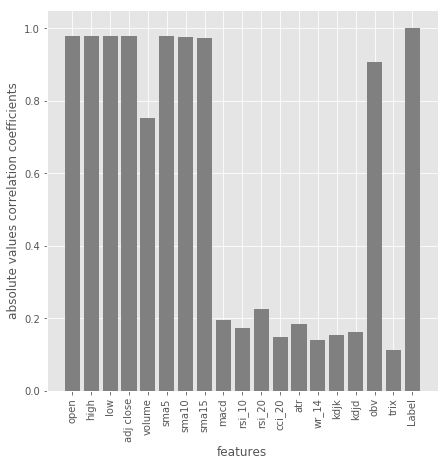

In [60]:
plt.figure(figsize=(7,7))
plt.bar(data2Scaled.columns.values,abs(data2Scaled.corr()['Label'].values),color='gray')
plt.xlabel('features')
plt.xticks(rotation=90)
plt.ylabel('absolute values correlation coefficients')
plt.show()

In [61]:
list = [column for column in l.index.values if 0.5<abs(l[column])<1]

In [62]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data2Scaled[list])
pcaData = pca.transform(data2Scaled[list])

In [63]:
components = ['PC' + str(x) for x in range(1,len(pca.explained_variance_)+1)]
varianceTable = pd.DataFrame({'Variance':pca.explained_variance_,'Variance %': pca.explained_variance_ratio_*100},index=components)

In [64]:
varianceTable

,Variance,Variance %
PC1,8.054367,93.646404
PC2,0.416266,4.839831
PC3,0.122402,1.423137
PC4,0.006166,0.071687
PC5,0.000828,0.009623
PC6,0.000426,0.004950
PC7,0.000182,0.002112
PC8,0.000152,0.001762
PC9,0.000042,0.000493


In [65]:
selectedComponents = [x for x,y in zip(range(len(pca.explained_variance_)),pca.explained_variance_) if y>=0.1]

In [66]:
componentTable = pd.DataFrame(index=list)
for x in selectedComponents:
    componentTable['PC' + str(x+1)] = pd.Series(pca.components_[x],index=list)

In [67]:
componentTable

,PC1,PC2,PC3
open,0.343930,-0.080311,-0.136177
high,0.343964,-0.078388,-0.129318
low,0.343823,-0.084031,-0.143880
adj close,0.343873,-0.081082,-0.135132
volume,0.272106,0.953257,0.131140
sma5,0.343910,-0.079897,-0.136702
sma10,0.343737,-0.077773,-0.135087
sma15,0.343214,-0.074866,-0.131994
obv,0.314118,-0.216872,0.924237


In [68]:
pcaData = pd.DataFrame(data=pcaData) 

In [69]:
X = np.array(pcaData[selectedComponents])
y = np.array(data2Scaled['Label'])
XCheck = X[-30:]
X = X[:-30]
yCheck = y[-30:]
y = y[:-30]

In [70]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False)
svr_rbf = svm.SVR(C=100000,gamma=0.01,epsilon=0.01)
# model = LinearRegression()
svr_rbf.fit(X_train,y_train)
print(svr_rbf)
r2rbf = svr_rbf.score(X_test,y_test)
print("R-squared = {}".format(r2rbf))

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R-squared = -1.7923769038117165


In [72]:
svr_poly = svm.SVR(C=100000,gamma=0.01,epsilon=0.0001,kernel='poly',degree=3)
# model = LinearRegression()
svr_poly.fit(X_train,y_train)
print(svr_poly)
r2poly = svr_poly.score(X_test,y_test)
print("R-squared = {}".format(r2poly))

SVR(C=100000, cache_size=200, coef0=0.0, degree=3, epsilon=0.0001, gamma=0.01,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R-squared = -20.872780379956207


In [73]:
svr_sigmoid = svm.SVR(C=10000,gamma=0.01,epsilon=0.1,kernel='sigmoid')
# model = LinearRegression()
svr_sigmoid.fit(X_train,y_train)
print(svr_sigmoid)
r2sigmoid = svr_sigmoid.score(X_test,y_test)
print("R-squared = {}".format(r2sigmoid))

SVR(C=10000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='sigmoid', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R-squared = -4.162140171331558


In [83]:
svr_linear = svm.SVR(C=100,epsilon=0.1,kernel='linear')
# model = LinearRegression()
svr_linear.fit(X_train,y_train)
print(svr_linear)
r2linear = svr_linear.score(X_test,y_test)
print("R-squared = {}".format(r2linear))

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
R-squared = 0.8726811812627617


In [75]:
predict = svr_linear.predict(XCheck)

In [76]:
df = pd.DataFrame(data=data1['adj close'][-30:])
df['Forecasted close'] = predict
df

,adj close,Forecasted close
date,,
2018-05-21,10516.700195,10448.965628
2018-05-22,10536.700195,10510.072584
2018-05-23,10430.349609,10588.854117
2018-05-24,10513.849609,10611.926789
2018-05-25,10605.150391,10630.830400
2018-05-28,10688.650391,10647.860182
2018-05-29,10633.299805,10636.148654
2018-05-30,10614.349609,10705.074694
2018-05-31,10736.150391,10709.374662


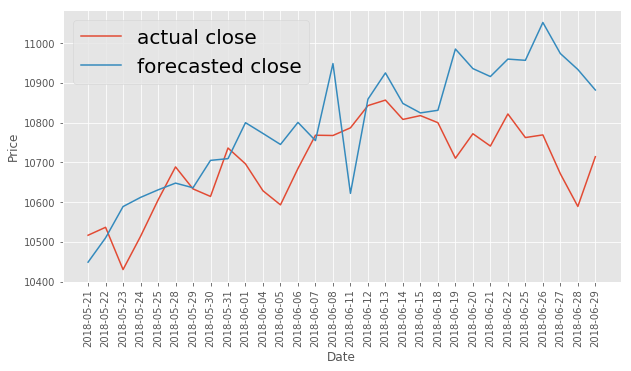

In [77]:
plt.figure(figsize=(10,5))
plt.plot(df['adj close'],label='actual close')
plt.plot(df['Forecasted close'],label='forecasted close')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.legend(fontsize=20)
plt.show()